In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
pd.set_option("display.max_columns", 50)

In [3]:
df = pd.read_excel('WQ_updated_with_WQI.xlsx')

In [4]:
df.head()

,WRIS ID,PH,EC,TOT_ALKALINITY,CA,MG,NA,FE,CHLORIDE,SULPHATE,NITRATE,FLUORIDE,TDS,Total_hardness,WQI,GRADE,QUALITY
0,W23881,8.34,355.0,160.0,22.0,18.225,25.70,1.288,17.725,3.21,3.63,0.37,217.748,129.7225,52.765156,C,Poor
1,W38814,8.46,596.0,205.0,14.0,20.655,75.67,0.125,38.995,46.22,2.46,0.24,360.745,119.6855,81.601765,D,Very poor
2,W24111,8.24,429.0,150.0,10.0,32.805,23.32,0.183,31.905,24.15,0.06,0.68,243.370,159.5005,60.979152,C,Poor
3,W38806,8.21,1077.0,165.0,18.0,70.470,85.95,0.120,124.075,47.48,184.20,0.16,681.918,333.9270,153.279010,E,Unsuitable
4,W38807,8.17,394.0,135.0,14.0,34.020,15.24,0.648,38.995,8.22,0.30,0.62,233.172,174.4820,57.871346,C,Poor


In [5]:
df.columns

Index(['WRIS ID', 'PH', 'EC', 'TOT_ALKALINITY', 'CA', 'MG', 'NA', 'FE',
       'CHLORIDE', 'SULPHATE', 'NITRATE', 'FLUORIDE', 'TDS', 'Total_hardness',
       'WQI', 'GRADE', 'QUALITY'],
      dtype='object')

In [6]:
df_x = df.drop(columns = ['WRIS ID', 'WQI', 'GRADE', 'QUALITY'])
df_x

,PH,EC,TOT_ALKALINITY,CA,MG,NA,FE,CHLORIDE,SULPHATE,NITRATE,FLUORIDE,TDS,Total_hardness
0,8.340,355.00,160.000,22.0000,18.225000,25.70,1.2880,17.725000,3.210000,3.6300,0.37,217.748,129.722500
1,8.460,596.00,205.000,14.0000,20.655000,75.67,0.1250,38.995000,46.220000,2.4600,0.24,360.745,119.685500
2,8.240,429.00,150.000,10.0000,32.805000,23.32,0.1830,31.905000,24.150000,0.0600,0.68,243.370,159.500500
3,8.210,1077.00,165.000,18.0000,70.470000,85.95,0.1200,124.075000,47.480000,184.2000,0.16,681.918,333.927000
4,8.170,394.00,135.000,14.0000,34.020000,15.24,0.6480,38.995000,8.220000,0.3000,0.62,233.172,174.482000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260,7.482,340.70,40.032,8.0064,3.636893,32.16,0.0300,42.540000,9.360800,5.0385,0.12,170.800,34.927261
2261,7.416,162.30,55.000,10.0000,10.922330,5.62,2.0500,17.494575,10.035882,1.1000,0.13,76.560,69.781553
2262,7.092,199.56,50.000,26.0000,12.135922,18.48,0.0600,52.493025,31.239580,0.7000,0.19,95.730,114.757282
2263,6.743,173.20,25.020,14.0112,8.488350,16.18,0.0292,53.175000,4.373400,0.5268,1.10,90.720,69.830233


In [7]:
df_y = df['GRADE']
df_y

0       C
1       D
2       C
3       E
4       C
       ..
2260    B
2261    A
2262    B
2263    A
2264    A
Name: GRADE, Length: 2265, dtype: object

In [8]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=101)

### Checking with imbalanced data first

In [11]:
array = np.arange(10, 101, 10)
params_rf = [{'n_estimators': array, 'max_features': ['auto', 'sqrt', 'log2']}]
rf_gs = GridSearchCV(rf, params_rf, cv=5, verbose=3, scoring='accuracy')

rf_gs.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END .............max_features=auto, n_estimators=10; total time=   0.0s
[CV 2/5] END .............max_features=auto, n_estimators=10; total time=   0.0s
[CV 3/5] END .............max_features=auto, n_estimators=10; total time=   0.0s
[CV 4/5] END .............max_features=auto, n_estimators=10; total time=   0.0s
[CV 5/5] END .............max_features=auto, n_estimators=10; total time=   0.0s
[CV 1/5] END .............max_features=auto, n_estimators=20; total time=   0.0s
[CV 2/5] END .............max_features=auto, n_estimators=20; total time=   0.0s
[CV 3/5] END .............max_features=auto, n_estimators=20; total time=   0.0s
[CV 4/5] END .............max_features=auto, n_estimators=20; total time=   0.0s
[CV 5/5] END .............max_features=auto, n_estimators=20; total time=   0.0s
[CV 1/5] END .............max_features=auto, n_estimators=30; total time=   0.0s
[CV 2/5] END .............max_features=auto, n_

[CV 1/5] END .............max_features=log2, n_estimators=20; total time=   0.0s
[CV 2/5] END .............max_features=log2, n_estimators=20; total time=   0.0s
[CV 3/5] END .............max_features=log2, n_estimators=20; total time=   0.0s
[CV 4/5] END .............max_features=log2, n_estimators=20; total time=   0.0s
[CV 5/5] END .............max_features=log2, n_estimators=20; total time=   0.0s
[CV 1/5] END .............max_features=log2, n_estimators=30; total time=   0.0s
[CV 2/5] END .............max_features=log2, n_estimators=30; total time=   0.0s
[CV 3/5] END .............max_features=log2, n_estimators=30; total time=   0.0s
[CV 4/5] END .............max_features=log2, n_estimators=30; total time=   0.0s
[CV 5/5] END .............max_features=log2, n_estimators=30; total time=   0.0s
[CV 1/5] END .............max_features=log2, n_estimators=40; total time=   0.0s
[CV 2/5] END .............max_features=log2, n_estimators=40; total time=   0.0s
[CV 3/5] END .............ma

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_features': ['auto', 'sqrt', 'log2'],
                          'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])}],
             scoring='accuracy', verbose=3)

In [12]:
#save best model
rf_best = rf_gs.best_estimator_#check best n_estimators value
print(rf_gs.best_params_)

{'max_features': 'log2', 'n_estimators': 90}


In [13]:
pred_rf = rf_best.predict(X_test)
print(accuracy_score(y_test,pred_rf))
pd.crosstab(y_test,pred_rf) 

0.9691176470588235


col_0,A,B,C,D,E
GRADE,,,,,
A,27,2,0,0,0
B,2,78,3,0,0
C,0,2,77,3,0
D,0,0,2,52,2
E,0,0,1,4,425


### Applying SMOTE to tackle imbalanced data

In [14]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()

In [15]:
X_train_sm, y_train_sm = sm.fit_resample(X_train.astype('float'),y_train)

In [16]:
from collections import Counter
print("Before SMOTE :" , Counter(y_train))
print("After SMOTE :" , Counter(y_train_sm))

Before SMOTE : Counter({'E': 1007, 'C': 173, 'B': 170, 'D': 150, 'A': 85})
After SMOTE : Counter({'E': 1007, 'C': 1007, 'D': 1007, 'B': 1007, 'A': 1007})


In [17]:
array = np.arange(10, 101, 10)
params_rf = [{'n_estimators': array, 'max_features': ['auto', 'sqrt', 'log2']}]
rf_gs = GridSearchCV(rf, params_rf, cv=5, verbose=3, scoring='accuracy')

rf_gs.fit(X_train_sm, y_train_sm)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END .............max_features=auto, n_estimators=10; total time=   0.0s
[CV 2/5] END .............max_features=auto, n_estimators=10; total time=   0.0s
[CV 3/5] END .............max_features=auto, n_estimators=10; total time=   0.0s
[CV 4/5] END .............max_features=auto, n_estimators=10; total time=   0.0s
[CV 5/5] END .............max_features=auto, n_estimators=10; total time=   0.0s
[CV 1/5] END .............max_features=auto, n_estimators=20; total time=   0.1s
[CV 2/5] END .............max_features=auto, n_estimators=20; total time=   0.1s
[CV 3/5] END .............max_features=auto, n_estimators=20; total time=   0.1s
[CV 4/5] END .............max_features=auto, n_estimators=20; total time=   0.0s
[CV 5/5] END .............max_features=auto, n_estimators=20; total time=   0.0s
[CV 1/5] END .............max_features=auto, n_estimators=30; total time=   0.1s
[CV 2/5] END .............max_features=auto, n_

[CV 3/5] END .............max_features=log2, n_estimators=10; total time=   0.0s
[CV 4/5] END .............max_features=log2, n_estimators=10; total time=   0.0s
[CV 5/5] END .............max_features=log2, n_estimators=10; total time=   0.0s
[CV 1/5] END .............max_features=log2, n_estimators=20; total time=   0.1s
[CV 2/5] END .............max_features=log2, n_estimators=20; total time=   0.0s
[CV 3/5] END .............max_features=log2, n_estimators=20; total time=   0.0s
[CV 4/5] END .............max_features=log2, n_estimators=20; total time=   0.0s
[CV 5/5] END .............max_features=log2, n_estimators=20; total time=   0.0s
[CV 1/5] END .............max_features=log2, n_estimators=30; total time=   0.1s
[CV 2/5] END .............max_features=log2, n_estimators=30; total time=   0.1s
[CV 3/5] END .............max_features=log2, n_estimators=30; total time=   0.1s
[CV 4/5] END .............max_features=log2, n_estimators=30; total time=   0.1s
[CV 5/5] END .............ma

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_features': ['auto', 'sqrt', 'log2'],
                          'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])}],
             scoring='accuracy', verbose=3)

In [18]:
#save best model
rf_best = rf_gs.best_estimator_#check best n_estimators value
print(rf_gs.best_params_)

{'max_features': 'log2', 'n_estimators': 70}


In [19]:
pred_rf = rf_best.predict(X_test)
print(accuracy_score(y_test,pred_rf))
pd.crosstab(y_test,pred_rf) 

0.9691176470588235


col_0,A,B,C,D,E
GRADE,,,,,
A,28,1,0,0,0
B,2,77,4,0,0
C,0,1,77,4,0
D,0,0,3,52,1
E,0,0,0,5,425


In [20]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           A       0.93      0.97      0.95        29
           B       0.97      0.93      0.95        83
           C       0.92      0.94      0.93        82
           D       0.85      0.93      0.89        56
           E       1.00      0.99      0.99       430

    accuracy                           0.97       680
   macro avg       0.93      0.95      0.94       680
weighted avg       0.97      0.97      0.97       680



### Evaluating the model

In [22]:
random_prob = [0 for _ in range(len(y_test))]
rf_probs = rf_best.predict_proba(X_test)

In [23]:
import scikitplot as skplt

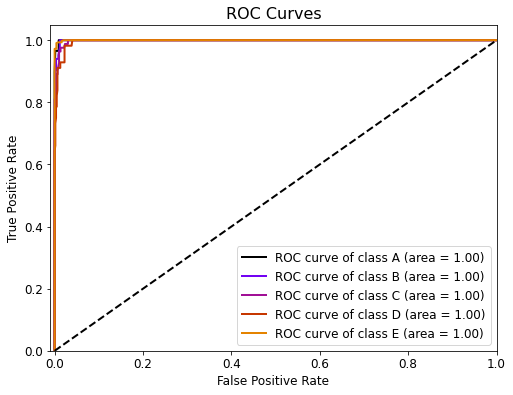

In [24]:
skplt.metrics.plot_roc(y_true=y_test, y_probas=rf_probs, figsize=(8,6), cmap = 'gnuplot', text_fontsize=12,
                       title_fontsize=16,plot_micro=False,plot_macro=False)
plt.xlim(-0.01,1)
plt.show()